# Rental Car Data Analysis

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset from csv file

df = pd.read_csv("../DATA/rental_car_analysis.csv")
df.head()

,Date,City,Car Type,Rental Price,Discount,Final Price
0,1 01 2022,New York,SUV,NaN,NaN,74.000000
1,1 01 2022,Chicago,Van,179.0,0.123538,156.886784
2,1 01 2022,Los Angeles,Van,NaN,0.000000,144.000000
3,1 01 2022,Houston,Truck,93.0,NaN,93.000000
4,1 01 2022,Phoenix,Truck,NaN,0.000000,124.000000


In [3]:
# Number of of rows in dataset

rows = df.shape[0]
print(f"The number of rows in dataset is {rows}")

The number of rows in dataset is 100


In [4]:
# Sum of duplicate in City column
df.duplicated('City').sum()

90

In [5]:
# Check missing values in dataset
df.isnull().sum()

Date             0
City             0
Car Type         0
Rental Price    50
Discount        34
Final Price      0
dtype: int64

In [6]:
# Fill in missing values with median values
df = df.fillna(df[["Rental Price","Discount"]].median())
df.isnull().sum()

Date            0
City            0
Car Type        0
Rental Price    0
Discount        0
Final Price     0
dtype: int64

In [7]:
# City with most revenue

city_most_revenue = df.groupby(by='City')['Final Price'].sum().idxmax()
print(f"The city with most revenue is {city_most_revenue}")

The city with most revenue is Phoenix


In [8]:
# Car type with most revenue
car_most_revenue = df.groupby(by='Car Type')['Final Price'].sum().idxmax()
print(f"The car type with most revenue is {car_most_revenue}")

The car type with most revenue is Van


In [9]:
# Car type most expensive to rent
car_most_expensive_rent = df.groupby(by='Car Type')['Rental Price'].mean().idxmax()
print(f"The car type most expensive to rent is {car_most_expensive_rent}")

The car type most expensive to rent is Van


In [10]:
# Two car types with least revenue

df_grouped = df.groupby(by='Car Type')['Final Price'].sum()

# Sort df_grouped by Final Price
least_revenue_car = df_grouped.sort_values().head(2)
least_revenue_car

Car Type
Sports    1636.880968
SUV       1996.634092
Name: Final Price, dtype: float64

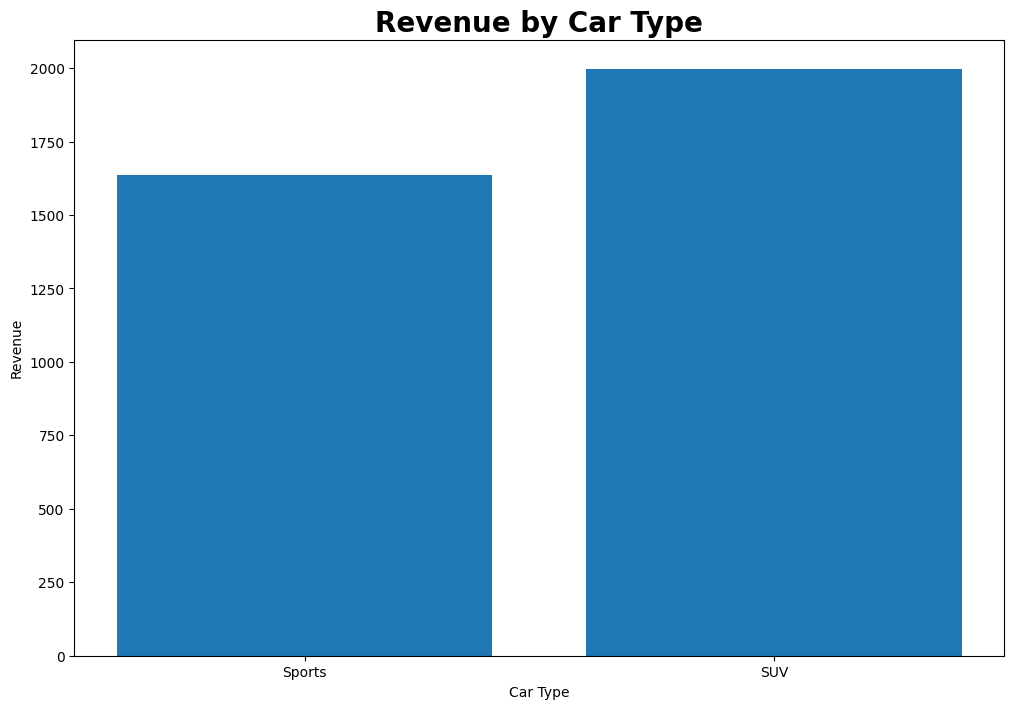

In [11]:
# Bar plot of least revenue car
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(x=least_revenue_car.index,height=least_revenue_car)
ax.set(xlabel='Car Type',ylabel='Revenue')
plt.title(label="Revenue by Car Type",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

In [12]:
# Total revenue of the business
total_revenue = df['Final Price'].sum()
print(f"The total revenue of the business is ${total_revenue:.2f}")

The total revenue of the business is $10926.06


In [13]:
# Without discounts, total revenue

total_revenue_without_discount = df['Rental Price'].sum()
print(f"The total revenue of the business without discount is ${total_revenue:.2f}")

The total revenue of the business without discount is $10926.06
